In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('./test_images/download (6).jpg')
img.shape

(194, 259, 3)

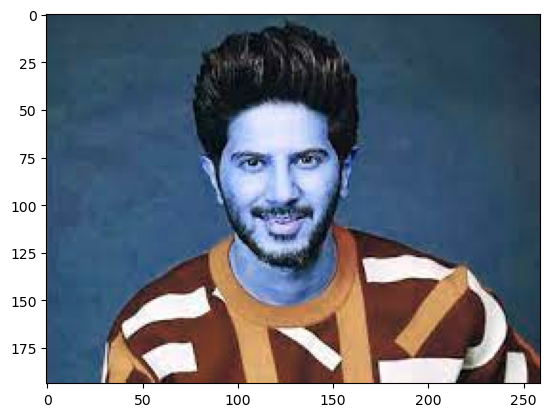

In [7]:
plt.imshow(img)

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(194, 259)

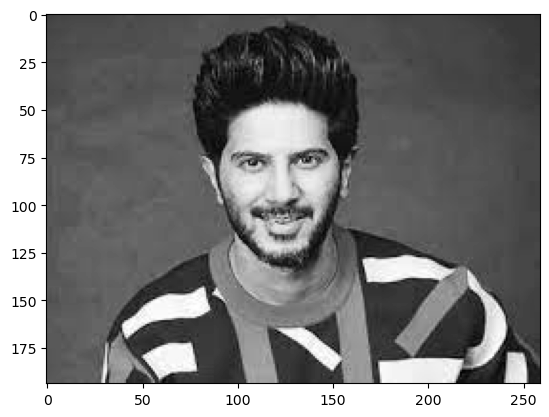

In [16]:
plt.imshow(gray, cmap='gray')

In [17]:
gray

array([[64, 64, 65, ..., 53, 53, 53],
       [64, 65, 66, ..., 53, 53, 53],
       [65, 66, 66, ..., 53, 53, 53],
       ...,
       [87, 87, 88, ..., 29, 35, 42],
       [92, 92, 91, ..., 32, 32, 32],
       [92, 92, 91, ..., 32, 32, 32]], dtype=uint8)

In [64]:
face_cascade = cv2.CascadeClassifier("C:\\Users\Vaish Parthi\Desktop\Datascience\PersonClassifier\Model\opencv\haarcascade\haarcascade_frontalface_default.xml")
eye_cascade =  cv2.CascadeClassifier("C:\\Users\Vaish Parthi\Desktop\Datascience\PersonClassifier\Model\opencv\haarcascade\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[85, 48, 78, 78]])

In [19]:
(x,y,w,h) = faces[0]
x,y,w,h

(85, 48, 78, 78)

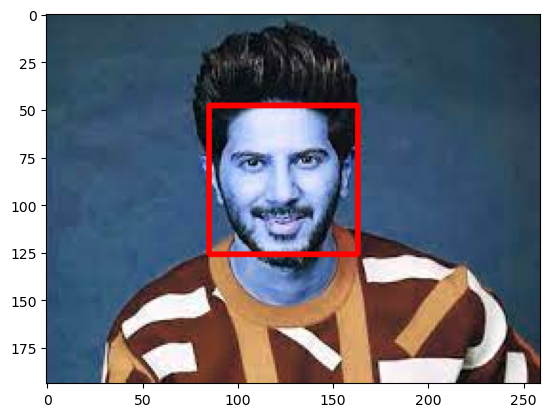

In [20]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

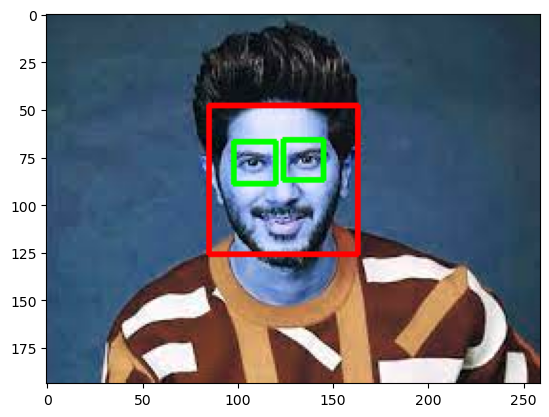

In [21]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

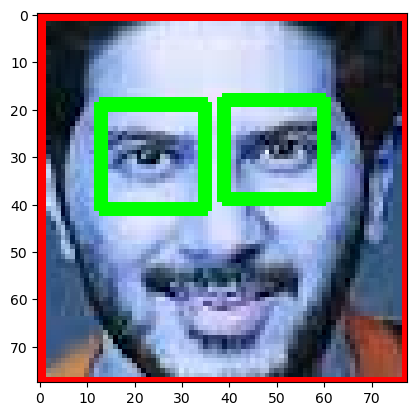

In [22]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [23]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

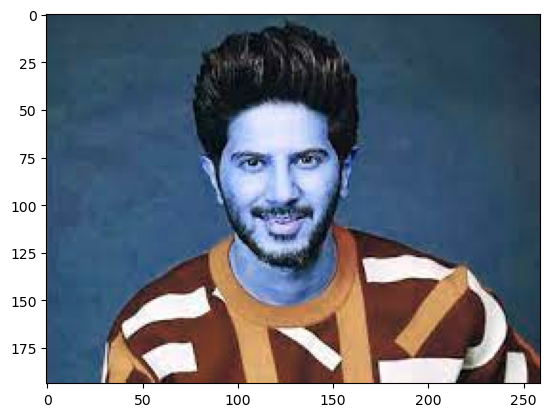

In [24]:
original_image = cv2.imread('./test_images/download (6).jpg')
plt.imshow(original_image)

In [25]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/download (6).jpg')
cropped_image_no_2_eyes

array([[[ 37,  46,  49],
        [ 32,  42,  42],
        [ 23,  31,  31],
        ...,
        [ 19,  15,  21],
        [  7,   9,  19],
        [ 21,  33,  45]],

       [[  2,  14,  16],
        [ 18,  28,  28],
        [ 32,  42,  42],
        ...,
        [ 22,  18,  24],
        [  8,  10,  20],
        [ 18,  27,  40]],

       [[  3,  15,  17],
        [ 15,  25,  25],
        [ 24,  34,  34],
        ...,
        [ 27,  23,  29],
        [ 10,  12,  22],
        [ 10,  19,  32]],

       ...,

       [[ 75,  82,  99],
        [103,  99, 104],
        [140, 127, 119],
        ...,
        [152,  79,  65],
        [154,  85,  76],
        [123,  63,  57]],

       [[102,  94,  94],
        [131, 114, 101],
        [173, 146, 120],
        ...,
        [156,  81,  65],
        [161,  89,  79],
        [130,  68,  60]],

       [[119,  99,  82],
        [151, 121,  92],
        [176, 137,  98],
        ...,
        [161,  83,  66],
        [169,  94,  80],
        [138,  74,  63]]

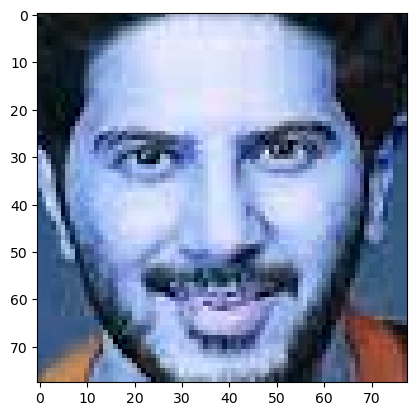

In [26]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/download (6).jpg')
plt.imshow(cropped_image)

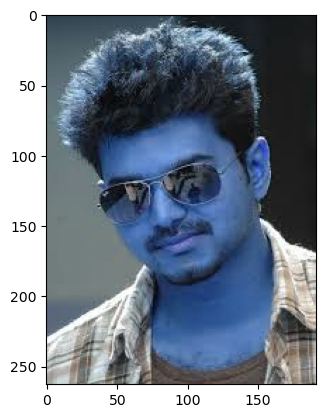

In [27]:
org_image_obstructed = cv2.imread('./test_images/vijay.jpg')
plt.imshow(org_image_obstructed)

In [28]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/vijay.jpg')
cropped_image_no_2_eyes

In [29]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped/"

In [30]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [31]:
img_dirs

['./dataset\\cropped',
 './dataset\\dulquer',
 './dataset\\nayanthara',
 './dataset\\Suriya',
 './dataset\\thrisha',
 './dataset\\vijay']

In [32]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [33]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    print(celebrity_name)
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
dulquer
Generating cropped images in folder:  ./dataset/cropped/dulquer
nayanthara
Generating cropped images in folder:  ./dataset/cropped/nayanthara
Suriya
Generating cropped images in folder:  ./dataset/cropped/Suriya
thrisha
Generating cropped images in folder:  ./dataset/cropped/thrisha
vijay
Generating cropped images in folder:  ./dataset/cropped/vijay


In [34]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'dulquer': ['./dataset/cropped/dulquer\\dulquer1.png',
  './dataset/cropped/dulquer\\dulquer2.png',
  './dataset/cropped/dulquer\\dulquer3.png',
  './dataset/cropped/dulquer\\dulquer4.png',
  './dataset/cropped/dulquer\\dulquer5.png',
  './dataset/cropped/dulquer\\dulquer6.png',
  './dataset/cropped/dulquer\\dulquer7.png',
  './dataset/cropped/dulquer\\dulquer8.png',
  './dataset/cropped/dulquer\\dulquer9.png'],
 'nayanthara': ['./dataset/cropped/nayanthara\\nayanthara1.png',
  './dataset/cropped/nayanthara\\nayanthara10.png',
  './dataset/cropped/nayanthara\\nayanthara11.png',
  './dataset/cropped/nayanthara\\nayanthara12.png',
  './dataset/cropped/nayanthara\\nayanthara13.png',
  './dataset/cropped/nayanthara\\nayanthara14.png',
  './dataset/cropped/nayanthara\\nayanthara2.png',
  './dataset/cropped/nayanthara\\nayanthara3.png',
  './dataset/cropped/nayanthara\\nayanthara4.png',
  './dataset/cropped/nayanthara\\nayanthara5.png',
  './dataset/cropped/nayanthara\\nayanthara6.png',
  '

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'dulquer': 0, 'nayanthara': 1, 'Suriya': 2, 'thrisha': 3, 'vijay': 4}

In [36]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [37]:
cropped_img = np.array(roi_color)
cropped_img.shape

()

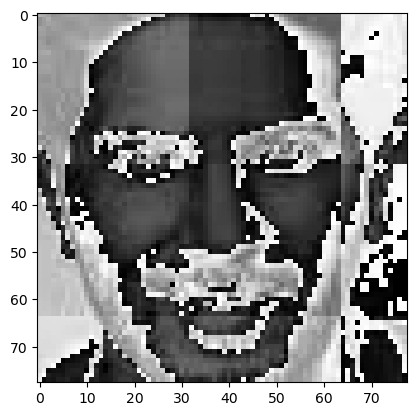

In [38]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [39]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [40]:
len(X[0])

4096

In [41]:
32*32*3 + 32*32

4096

In [42]:
X[0]

array([[32],
       [20],
       [32],
       ...,
       [ 6],
       [ 5],
       [ 7]], dtype=uint8)

In [43]:
y[0]

0

In [44]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(61, 4096)

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.4375

In [47]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3
           2       0.50      0.20      0.29         5
           3       0.60      0.75      0.67         4
           4       0.20      0.50      0.29         2

    accuracy                           0.44        16
   macro avg       0.36      0.42      0.36        16
weighted avg       0.43      0.44      0.40        16



C:\Users\Vaish Parthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vaish Parthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vaish Parthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.622222,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.422222,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.600000,{'logisticregression__C': 1}


In [51]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [52]:
best_estimators['svm'].score(X_test,y_test)

0.5625

In [53]:
best_estimators['random_forest'].score(X_test,y_test)

0.375

In [54]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.375

In [55]:
best_clf = best_estimators['svm']


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 1, 0, 0],
       [0, 2, 1, 0, 0],
       [1, 0, 2, 0, 2],
       [0, 1, 0, 3, 0],
       [0, 0, 1, 0, 1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

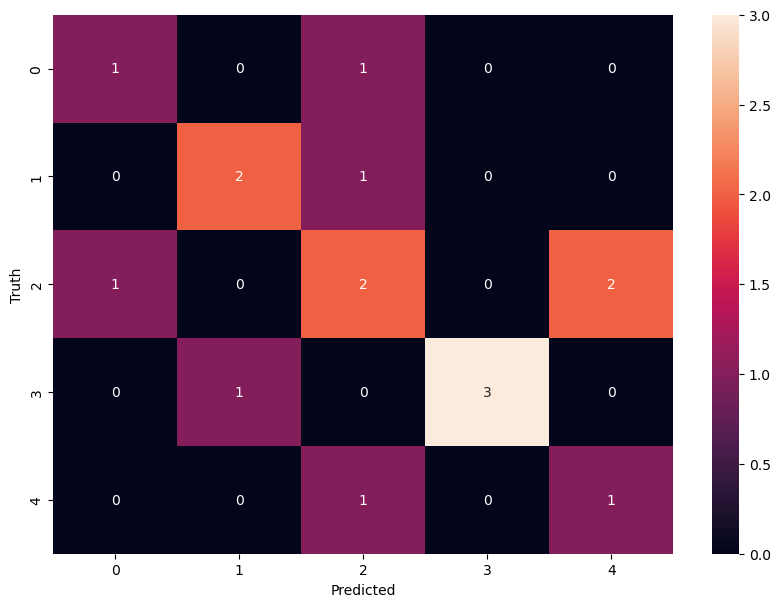

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'dulquer': 0, 'nayanthara': 1, 'Suriya': 2, 'thrisha': 3, 'vijay': 4}

In [61]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [60]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))